In [2]:
import networkx as nx
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
imgs_path = "../img"
with open("./bfs_adj_list.json", "r") as graph_file:
    graph_data = graph_file.read()
graph_dict = json.loads(graph_data)

In [4]:
graph = nx.DiGraph(graph_dict)

In [5]:
print("Number of nodes", graph.number_of_nodes())
print("Number of edges", graph.number_of_edges())

Number of nodes 2916
Number of edges 109213


In [6]:
print("Density", nx.density(graph))

Density 0.0128483766149734


Degree distribution


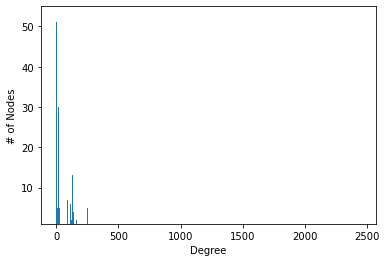

In [7]:
print("Degree distribution")
graph_degree_sequence = sorted([d for n,d in graph.degree()], reverse=True)
graph_degree_distribution_fig, graph_degree_distribution_ax = plt.subplots()
graph_degree_distribution = graph_degree_distribution_ax.bar(*np.unique(graph_degree_sequence, return_counts=True))
graph_degree_distribution_ax.set_xlabel("Degree")
graph_degree_distribution_ax.set_ylabel("# of Nodes")
plt.ylim(1,55)
plt.savefig(f"{imgs_path}/otu_degree_distribution.png")

Degree distribution (log-log)


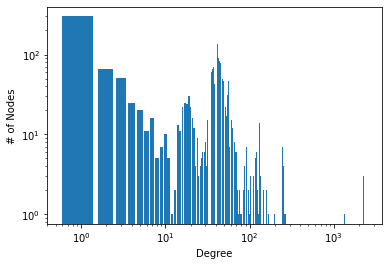

In [8]:
print("Degree distribution (log-log)")
graph_degree_sequence = sorted([d for n,d in graph.degree()], reverse=True)
graph_degree_distribution_fig, graph_degree_distribution_ax = plt.subplots()
graph_degree_distribution = graph_degree_distribution_ax.bar(*np.unique(graph_degree_sequence, return_counts=True))
graph_degree_distribution_ax.set_xlabel("Degree")
graph_degree_distribution_ax.set_ylabel("# of Nodes")
plt.xscale("log")
plt.yscale("log")
plt.savefig(f"{imgs_path}/otu_log_log_degree_distribution.png")

In [9]:
graph_avg_clust_coef = nx.average_clustering(graph)
print("Average clustering coefficient", graph_avg_clust_coef)

Average clustering coefficient 0.4567430260826711


In [10]:
graph_comps = nx.strongly_connected_components(graph)
print("Number of nodes in SCC", max([len(c) for c in sorted(graph_comps, key=len, reverse=True)]))

graph_comps = list(sorted(nx.strongly_connected_components(graph), key=len, reverse=True)[0])
graph_scc_subgraph = graph.subgraph(graph_comps)

print("Average shortest path length", nx.average_shortest_path_length(graph_scc_subgraph))
print("Diameter", nx.diameter(graph_scc_subgraph))

Number of nodes in SCC 2225
Average shortest path length 4.685841484116078
Diameter 64


In [17]:
graph_wcc = nx.weakly_connected_components(graph)
nodes_wcc = max([len(c) for c in sorted(graph_wcc, key=len, reverse=True)])

graph_wcc_comps = list(sorted(nx.weakly_connected_components(graph), key=len, reverse=True)[0])
graph_wcc_subgraph = graph.subgraph(graph_wcc_comps)

print("Nodes in WCC", nodes_wcc)
print("Average shortest path length", nx.average_shortest_path_length(graph_wcc_subgraph))
print("Diameter", nx.diameter(graph_wcc_subgraph.to_undirected()))

Nodes in WCC 2916
Average shortest path length 3.7103245358311745
Diameter 8
